# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [1]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression 
from scipy import stats
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Your code here. 
x_values = [17, 51, 27, 21, 36, 48, 19, 26, 54, 40]
y_values = [10, 1, 5, 9, 4, 2, 9, 6, 0, 3] 

student_data = pd.DataFrame({'X': x_values, 'Y': y_values})
student_data.head()

,X,Y
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4


Draw a dispersion diagram (scatter plot) for the data.

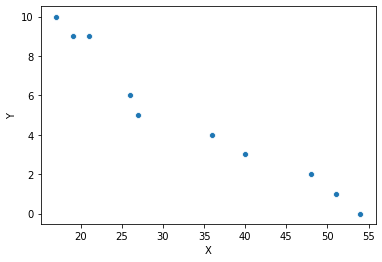

In [3]:
# Your code here. 
scat = sns.scatterplot(data=student_data, x='X', y='Y')
scat


Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [4]:
# Your response here. 
"""
Looks like there is a negatice correlation which means that as the age goes up the number of tardies decreases
"""

'\nLooks like there is a negatice correlation which means that as the age goes up the number of tardies decreases\n'

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [5]:
# Your response here. 
student_data.corr()

,X,Y
X,1.000000,-0.973495
Y,-0.973495,1.000000


There is a strog negative correlation between X and Y

In [6]:
student_data.cov()

,X,Y
X,191.211111,-47.677778
Y,-47.677778,12.544444


The covariance of X and Y is also negative, which confirms us that there is linear relationship and that is is negative.

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [7]:
# Your response here. 
x = student_data['X'].values.reshape(-1,1)
y = student_data['Y'].values.reshape(-1,1)
model = LinearRegression().fit(x, y)

In [8]:
print('R2 is:', model.score(x,y))
print('Coefficient: ',model.coef_[0][0])
print('intercept: ', model.intercept_[0])

R2 is: 0.9476925194301435
Coefficient:  -0.24934627229937825
intercept:  13.352838630948924


In [9]:
# Predict Values 

predicted = model.predict(x)
student_data['predicted tardies'] = predicted 
y_pred = predicted.reshape(-1,1)
student_data.head(60)

,X,Y,predicted tardies
0,17,10,9.113952
1,51,1,0.636179
2,27,5,6.620489
3,21,9,8.116567
4,36,4,4.376373
5,48,2,1.384218
6,19,9,8.615259
7,26,6,6.869836
8,54,0,-0.111860
9,40,3,3.378988


Plot your regression model on your scatter plot.

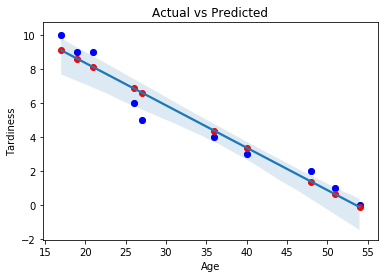

In [10]:
# Your code here.
sns.regplot(x, y)
plt.scatter(x, y, color = "blue")
plt.scatter(x, y_pred, color = "red")
plt.title("Actual vs Predicted")
plt.xlabel("Age")
plt.ylabel("Tardiness")
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [11]:
# Your response here.  
"""
We can see that the linear regression fits the model well. The r-squared is 0.94, which means that our model fits the data well. 

However, this dataset is very limited, so ideally you would like to analyze this with a lot more data.  

"""

'\nWe can see that the linear regression fits the model well. The r-squared is 0.94, which means that our model fits the data well. \n\nHowever, this dataset is very limited, so ideally you would like to analyze this with a lot more data.  \n\n'

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [12]:
# Import any libraries you may need & the data 
vehicles = pd.read_csv('vehicles.csv') 
vehicles.head()


,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [13]:
# Your response here. 
vehicles = vehicles[['CO2 Emission Grams/Mile', 'Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [14]:
# First let's take a look at the correlations 
vehicles.corr()

,CO2 Emission Grams/Mile,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year
CO2 Emission Grams/Mile,1.000000,-0.222300,0.752393,0.986189,-0.926229,0.930865
Year,-0.222300,1.000000,0.082469,-0.221084,0.204751,-0.091913
Cylinders,0.752393,0.082469,1.000000,0.739517,-0.698648,0.778153
Fuel Barrels/Year,0.986189,-0.221084,0.739517,1.000000,-0.909743,0.916208
Combined MPG,-0.926229,0.204751,-0.698648,-0.909743,1.000000,-0.875185
Fuel Cost/Year,0.930865,-0.091913,0.778153,0.916208,-0.875185,1.000000


In [15]:
# Feature Selection Filter method by using the correlation coefficient 
# We keep the highly correlated values, and check that they are not highly correlated with each other, if so we drop the other value
# Year only has a small correlation we will drop it
# For example Fual Barrels/Year and Fuel Cost/Year have ahigh correlationw will Fuel Cost/ Year

In [16]:
# Let's use multivarient regression


lr = LinearRegression()
X_train = vehicles[['Cylinders', 'Fuel Barrels/Year', 'Combined MPG']]
Y_train = vehicles["CO2 Emission Grams/Mile"]
lr.fit(X_train,Y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
# Predict 

y_predict = lr.predict(X_train)
vehicles['predicted CO2'] = y_predict

In [18]:
vehicles.head()

,CO2 Emission Grams/Mile,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,predicted CO2
0,522.764706,1984,4.0,19.388824,17,1950,519.709580
1,683.615385,1984,6.0,25.354615,13,2550,668.909396
2,555.437500,1985,4.0,20.600625,16,2100,549.575657
3,683.615385,1985,6.0,25.354615,13,2550,668.909396
4,555.437500,1987,6.0,20.600625,16,2550,555.231092


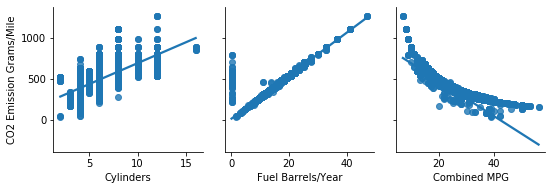

In [19]:
sns.pairplot(vehicles, y_vars='CO2 Emission Grams/Mile', x_vars=['Cylinders', 'Fuel Barrels/Year', 'Combined MPG'], kind='reg')

In [20]:
# From the graphs we actually see that the linear regression model fits best with Fueld Barrels/Year, for cylinders and combined MPG
# The resulst are not clearly linear. 

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [21]:
# Your response here. 
import sklearn.metrics as metrics
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [22]:
regression_results(Y_train, y_predict)

explained_variance:  0.9782
mean_squared_log_error:  0.004
r2:  0.9782
MAE:  6.2571
MSE:  308.3774
RMSE:  17.5607


## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [23]:
# Your code here. 
x = [1, 3, 4, 6, 8, 9, 11, 14]
y = [1, 2, 4, 4, 5, 7, 8, 13] 

df = pd.DataFrame({'x': x, 'y': y})
x = df['x'].values.reshape(-1, 1)
x = df['x'].values.reshape(-1, 1)
y = df['y'].values.reshape(-1, 1)



Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

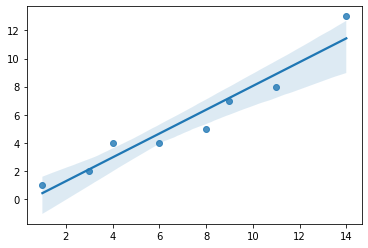

In [24]:
# Your code here. 
sns.regplot(x, y)

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [25]:
# Your response here. 
#It looks like as the invites increase also the attending people increases

In [26]:
lm = LinearRegression()
lm.fit(x.reshape(-1,1),y.reshape(-1,1))
y_pred = lm.predict(x)

regression_results(y, y_pred)

explained_variance:  0.9317
mean_squared_log_error:  0.0323
r2:  0.9317
MAE:  0.7992
MSE:  0.8712
RMSE:  0.9334


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [27]:
# Your response here. 
x = [1, 3, 4, 6, 8, 9, 11, 14]
y = [1, 2, 4, 4, 5, 7, 8, 13] 


x.remove(14)
x.remove(6)
x.remove(4) 
y.remove(13)
y.remove(4)
y.remove(4)

df = pd.DataFrame({'x': x, 'y': y})
x = df['x'].values.reshape(-1, 1)
x = df['x'].values.reshape(-1, 1)
y = df['y'].values.reshape(-1, 1)


What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

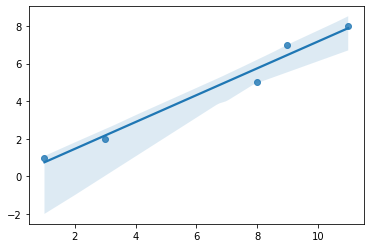

In [28]:
# Your response here. 
sns.regplot(x,y)

In [29]:
lm2 = LinearRegression()
lm2.fit(x,y)
y_pred2 = lm2.predict(x)

regression_results(y, y_pred2)


explained_variance:  0.9743
mean_squared_log_error:  0.008
r2:  0.9743
MAE:  0.3663
MSE:  0.191
RMSE:  0.437
